## ВШЭ, ФКН, Программа "Специалист по Data Science" (2021/2022)
## Курс "Машинное обучение"
## ДЗ №1: Работа с библиотеками numpy, pandas и matplotlib
## Выполнил: Кирилл Н., ibnkir@yandex.ru, 13.12.2021 г.
***

#### Numpy
* [Задание 1](#task1) [1 бал]
* [Задание 2](#task2) [1 бал]
* [Задание 3](#task3) [1 бал]
* [Задание 4](#task4) [1 бал]
* [Задание 5](#task5) [1 бал]

#### Pandas
* [Задание 6](#task6) [1 бал]
* [Задание 7](#task7) [1 бал]
* [Задание 8](#task8) [1 бал]
* [Задание 9](#task9) [1 бал]
* [Задание 10](#task10) [1 бал]
* [Задание 11](#task11) [1 бал]
* [Задание 12](#task12) [1 бал]

#### Matplotlib
* [Задание 13](#task13) [1 бал]
* [Задание 14](#task14) [1 бал]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

## Часть 1. Numpy

In [140]:
import numpy as np

Во всех задачах этой части необходимо написать код решения внутри функции и проверить его работу на приведенных для вашего удобства тестах.

При решении задач можно использовать только библиотеку `numpy`. Запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде предполагается, что массив - это одномерный `numpy.array`, а матрица - это двумерный `numpy.array`. 

### Задание 1 <a id="task1"></a>

Создайте массив первых n нечетных натуральных чисел, записанных в порядке убывания. Например, если `n=5`, то ответом будет `array([9, 7, 5, 3, 1])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [141]:
def first_even_numbers(n: int):
    # your code here
    return np.arange(2*n-1, -1, -2)

In [142]:
assert np.allclose(first_even_numbers(5), np.array([9, 7, 5, 3, 1]))
assert np.allclose(first_even_numbers(1), np.array([1]))
assert np.allclose(first_even_numbers(10), np.array([19, 17, 15, 13, 11, 9, 7, 5, 3, 1]))

### Задание 2 <a id="task2"></a>

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [143]:
def change_array(array: np.array, number: int):
    # your code here
    new_array = np.array(array)
    idx = np.arange(0, len(array), 3)
    new_array[idx] = number
    return new_array

In [144]:
array1 = np.array([3, 5, 1, 0, -3, 22, 213436])
number1 = -111
assert np.allclose(change_array(array1, number1), np.array([-111, 5, 1, -111, -3, 22, -111]))

array2 = np.array([3, 14, 15, 92, 6])
number2 = 8
assert np.allclose(change_array(array2, number2), np.array([8, 14, 15, 8, 6]))

### Задание 3 <a id="task3"></a>

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

_Функции, которые могут пригодиться при решении: `.mean()`, `.std()`, `.nan_to_num()`_

In [145]:
def normalize(matrix: np.array):
    # your code here
    np.seterr(divide='ignore', invalid='ignore')
    norm_matrix = (matrix - np.mean(matrix, axis=0)) / np.std(matrix, axis=0)
    np.nan_to_num(norm_matrix, copy=False, nan=0)
    return norm_matrix

In [146]:
matrix1 = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
assert np.allclose(
    normalize(matrix1),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

matrix2 = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])
assert np.allclose(
    normalize(matrix2),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

matrix3 = np.array([[0.1, 0.2, 0.3, 0.4], [0.1, 0.5, 0.6, 0.7]])
assert np.allclose(
    normalize(matrix3),
    np.array([[0, -1, -1, -1], [0, 1, 1, 1]])
)

### Задание 4 <a id="task4"></a>

Напишите функцию, вычисляющую производную данного полинома. Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([12, 12, 0])`, соответствующий полиному $12x^2 + 12x$.

_Функции, которые могут пригодиться при решении: `.arange()`_

In [147]:
def derivative(coefs: np.array):
    # your code here
    deriv_coefs = np.arange(len(coefs)-1, -1, -1)
    deriv_coefs *= coefs
    return deriv_coefs[:len(coefs)-1]

In [148]:
coefs1 = np.array([4, 6, 0, 1])
assert np.allclose(
    derivative(coefs1),
    np.array([12, 12, 0])
)

coefs2 = np.array([1, 7, -12, 21, -6])
assert np.allclose(
    derivative(coefs2),
    np.array([4, 21, -24, 21])
)

### Задание 5 <a id="task5"></a>

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

_Функции, которые могут пригодиться при решении: `.T`, `.identity()`, `.diagonal`_

In [149]:
def make_symmetric(matrix: np.array):
    # your code here
    new_matrix = matrix + matrix.T - matrix.diagonal() * np.identity(len(matrix))
    return new_matrix

In [150]:
matrix1 = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix1),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

matrix2 = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix2),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

## Часть 2. Pandas

In [151]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

### Задание 6 <a id="task6"></a>

Откройте в ноутбуке файл с данными (["train.csv"](https://raw.githubusercontent.com/AKuzina/ml_dpo/main/hw/train.csv)). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [152]:
# your code here
df_train = pd.read_csv('train.csv', index_col='PassengerId')
print("Размер таблицы:")
df_train.shape

Размер таблицы:


(891, 11)

In [153]:
print('Первые 5 строк:')
df_train.head(5)

Первые 5 строк:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
print('Последние 5 строк:')
df_train.tail(5)

Последние 5 строк:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Задание 7 <a id="task7"></a>

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [155]:
# your code here
surv_num = df_train['Survived'].sum()
print('Общая доля выживших: {:.2f}%'.format(surv_num / len(df_train) * 100))

surv_m_num = df_train[df_train['Sex']=='male']['Survived'].sum()
print('Доля мужчин среди выживших: {:.2f}%'.format(surv_m_num / surv_num * 100))

surv_f_num = df_train[df_train['Sex']=='female']['Survived'].sum()
print('Доля женщин среди выживших: {:.2f}%'.format(surv_f_num / surv_num * 100))

Общая доля выживших: 38.38%
Доля мужчин среди выживших: 31.87%
Доля женщин среди выживших: 68.13%


### Задание 8 <a id="task8"></a>

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [156]:
# your code here
print('Минимальная стоимость по всей выборке: {:.2f}'.format(df_train['Fare'].min()))
print('Средняя стоимость по всей выборке: {:.2f}'.format(df_train['Fare'].mean()))
print('Максимальная стоимость по всей выборке: {:.2f}'.format(df_train['Fare'].max()))

print('\nМинимальная стоимость для севших в Саутгемптоне: {:.2f}'.format(df_train[df_train['Embarked']=='S']['Fare'].min()))
print('Средняя стоимость для севших в Саутгемптоне: {:.2f}'.format(df_train[df_train['Embarked']=='S']['Fare'].mean()))
print('Максимальная стоимость для севших в Саутгемптоне: {:.2f}'.format(df_train[df_train['Embarked']=='S']['Fare'].max()))

Минимальная стоимость по всей выборке: 0.00
Средняя стоимость по всей выборке: 32.20
Максимальная стоимость по всей выборке: 512.33

Минимальная стоимость для севших в Саутгемптоне: 0.00
Средняя стоимость для севших в Саутгемптоне: 27.08
Максимальная стоимость для севших в Саутгемптоне: 263.00


### Задание 9 <a id="task9"></a>

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

<span style="color:blue">
Перечисленные ниже признаки не несут полезной информации:
        
1. Name:
    - Гендерная информация уже содержится в колонке Sex;
    - Имена и фамилии сами по себе в отрыве от остальных данных будут иметь незначительную корреляцию с результирующим признаком Survived.

2. Ticket:
    - Информация о цене, классе и палубе уже содержится в других признаках (в Fare, Pclass и Cabin соответственно);
    - В колонке Ticket встречаются как строковые, так и числовые значения, поэтому их сложно будет закодировать разумным способом.

Примечание: признак Embarked тоже можно было бы удалить, если бы мы точно знали, что пассажиры разных типов были одинаково представлены во всех портах отправления. Но поскольку у нас нет такой информации, то лучше оставить эту колонку и потом закодировать (см. ДЗ №0).
</span>

In [157]:
# Удаляем перечисленные выше признаки:
df_train.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


### Задание 10 <a id="task10"></a>

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [158]:
# Выводим общую информацию о датафрейме, включая кол-во строк и непустых значений в каждом из столбцов
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


<span style="color:blue">
Вывод: да, в столбцах Age, Cabin и Embarked есть пропуски.
</span>

In [159]:
# Выводим кол-во пропусков в каждом из столбцов
print('Количество пропусков в каждом из столбцов:')
df_train.isnull().sum()

Количество пропусков в каждом из столбцов:


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Задание 11 <a id="task11"></a>

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [160]:
# Заполняем пропуски для признака Age (заменяем NaN на медианное значение по всей выборке)
df_train['Age'].fillna(value=df_train['Age'].median(), inplace=True)

In [161]:
# Вместо признака Cabin добавляем столбец Deck (это литера палубы, равная 1-й букве в номере кабины) и 
# заполняем пропуски в Deck с помощью столбцов Cabin и Pclass, т.е. вместо NaN вставляем литеру палубы, которая наиболее часто 
# встречается у данного Pclass

# Сначала находим наиболее часто встречающиеся палубы для каждого класса
df_train['Deck'] = df_train[~df_train['Cabin'].isnull()]['Cabin'].apply(lambda x: x[0])

from collections import Counter

pclass1_decks = df_train[(df_train['Pclass']==1) & (~df_train['Deck'].isnull())]['Deck'].values
pclass1_most_common_deck = Counter(pclass1_decks).most_common()[0][0]

pclass2_decks = df_train[(df_train['Pclass']==2) & (~df_train['Deck'].isnull())]['Deck'].values
pclass2_most_common_deck = Counter(pclass2_decks).most_common()[0][0]

pclass3_decks = df_train[(df_train['Pclass']==3) & (~df_train['Deck'].isnull())]['Deck'].values
pclass3_most_common_deck = Counter(pclass3_decks).most_common()[0][0]

# Далее заполняем пропуски в Deck с помощью словаря
freq_dict = {
    1: pclass1_most_common_deck,
    2: pclass2_most_common_deck,
    3: pclass3_most_common_deck
}

df_train['Deck'] = df_train.apply(
    lambda row: freq_dict[row['Pclass']] if pd.isnull(row['Deck']) else row['Deck'],
    axis=1
)

# Удаляем признак Cabin
df_train.drop(['Cabin'], axis=1, inplace=True)

In [162]:
# Заполняем пропуски для признака Embarked (заменяем NaN на наиболее часто встречающийся порт отправления)
ports = df_train[~df_train['Embarked'].isnull()]['Embarked'].values
most_common_port = Counter(ports).most_common()[0][0]
df_train['Embarked'].fillna(value=most_common_port, inplace=True)

In [163]:
# Убеждаемся, что пропусков нигде не осталось
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [164]:
# Выводим обновленный датафрейм
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,F
2,1,1,female,38.0,1,0,71.2833,C,C
3,1,3,female,26.0,0,0,7.9250,S,F
4,1,1,female,35.0,1,0,53.1000,S,C
5,0,3,male,35.0,0,0,8.0500,S,F
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,F
888,1,1,female,19.0,0,0,30.0000,S,B
889,0,3,female,28.0,1,2,23.4500,S,F


### Задание 12 <a id="task12"></a>

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. 

In [165]:
# Добавим признак Family = SibSp + Parc + 1, где
# -- SibSp - количество братьев, сестер, мужей и жён этого пассажира на данном корабле,
# -- Parch - количество детей и родителей этого пассажира на данном корабле
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,F,2
2,1,1,female,38.0,1,0,71.2833,C,C,2
3,1,3,female,26.0,0,0,7.9250,S,F,1
4,1,1,female,35.0,1,0,53.1000,S,C,2
5,0,3,male,35.0,0,0,8.0500,S,F,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,F,1
888,1,1,female,19.0,0,0,30.0000,S,B,1
889,0,3,female,28.0,1,2,23.4500,S,F,4


# Часть 3. Matplotlib

### Задание 13 <a id="task13"></a>

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию [`plt.subplots`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html).

* Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots` 
* Используйте функции `set_xlabel`, `set_ylabel`, `set_title` чтобы добавить подписи осей и названия графикам
* Для построения гистограммы используйте функуию [`hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
* Каждая гистограмма должна быть нормирована (полезными могут оказаться параметры `density`)


В итоге ваш график должен выглядеть примерно так

![](plot_13.png)

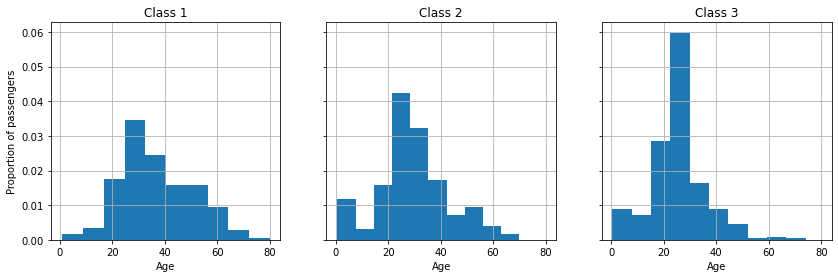

In [166]:
# your code here
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,4), sharey=True, sharex=True) 

df_train[df_train['Pclass']==1]['Age'].plot.hist(ax=ax1, title = 'Class 1', density=True)
ax1.set_xlabel("Age")
ax1.set_ylabel("Proportion of passengers")
ax1.grid(True)

df_train[df_train['Pclass']==2]['Age'].plot.hist(ax=ax2, title = 'Class 2', density=True)
ax2.set_xlabel("Age")
ax2.grid(True)

df_train[df_train['Pclass']==3]['Age'].plot.hist(ax=ax3, title = 'Class 3', density=True)
ax3.set_xlabel("Age")
ax3.grid(True)

plt.show()

### Задание 14 <a id="task14"></a>

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. 

* Обозначьте выживших и погибших пассажиров (`Survived`) разными цветами (аргумент `c` функции `scatter`) и маркерами (аргумент `c` функции `marker`). 
* Также укажите на графике легенду (функция [`plt.legend`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html))
* Используйте аргумент `fontsize`, чтобы регулировать размер шрифта в подписях

В итоге ваш график должен выглядеть примерно так

![](plot_14.png)

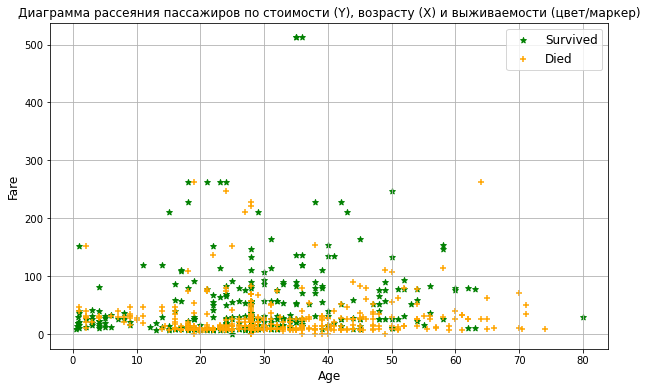

In [167]:
# your code here
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.scatter(df_train[df_train['Survived']==1]['Age'], df_train[df_train['Survived']==1]['Fare'], 
           label= 'Survived', c='green', marker='*')

ax.scatter(df_train[df_train['Survived']==0]['Age'], df_train[df_train['Survived']==0]['Fare'], 
           label='Died', c='orange', marker='+')

plt.title("Диаграмма рассеяния пассажиров по стоимости (Y), возрасту (X) и выживаемости (цвет/маркер)",
          fontsize=12, loc = 'center')
plt.grid(True)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
ax.legend(loc="upper right", fontsize=12)

plt.show()